In [1]:
# Bryans individual is not limited to BryanIndividual.ipynb
from neo4j import GraphDatabase
import matplotlib.pyplot as plt
import networkx as nx
from UtilsNeo4J import setup_neo4j_driver, get_total_unique_entries, get_synonyms, get_antonyms


driver = setup_neo4j_driver(
    uri="neo4j+s://f2d488e8.databases.neo4j.io",
    user="neo4j",
    password="EEftBBSnXlP8rzseU038drph7Ue5SzVVxDvlX2kL2y8"  # Remember to replace with your actual password!
)

# Get the total number of unique entries in the lexicon
total_unique_entries = get_total_unique_entries(driver)
print(f"Total number of unique entries: {total_unique_entries}")

Total number of unique entries: 7353


/tmp/ipykernel_20725/831635172.py:13: DeprecationWarning: read_transaction has been renamed to execute_read
  synonyms = session.read_transaction(fetch_synonyms, limit)


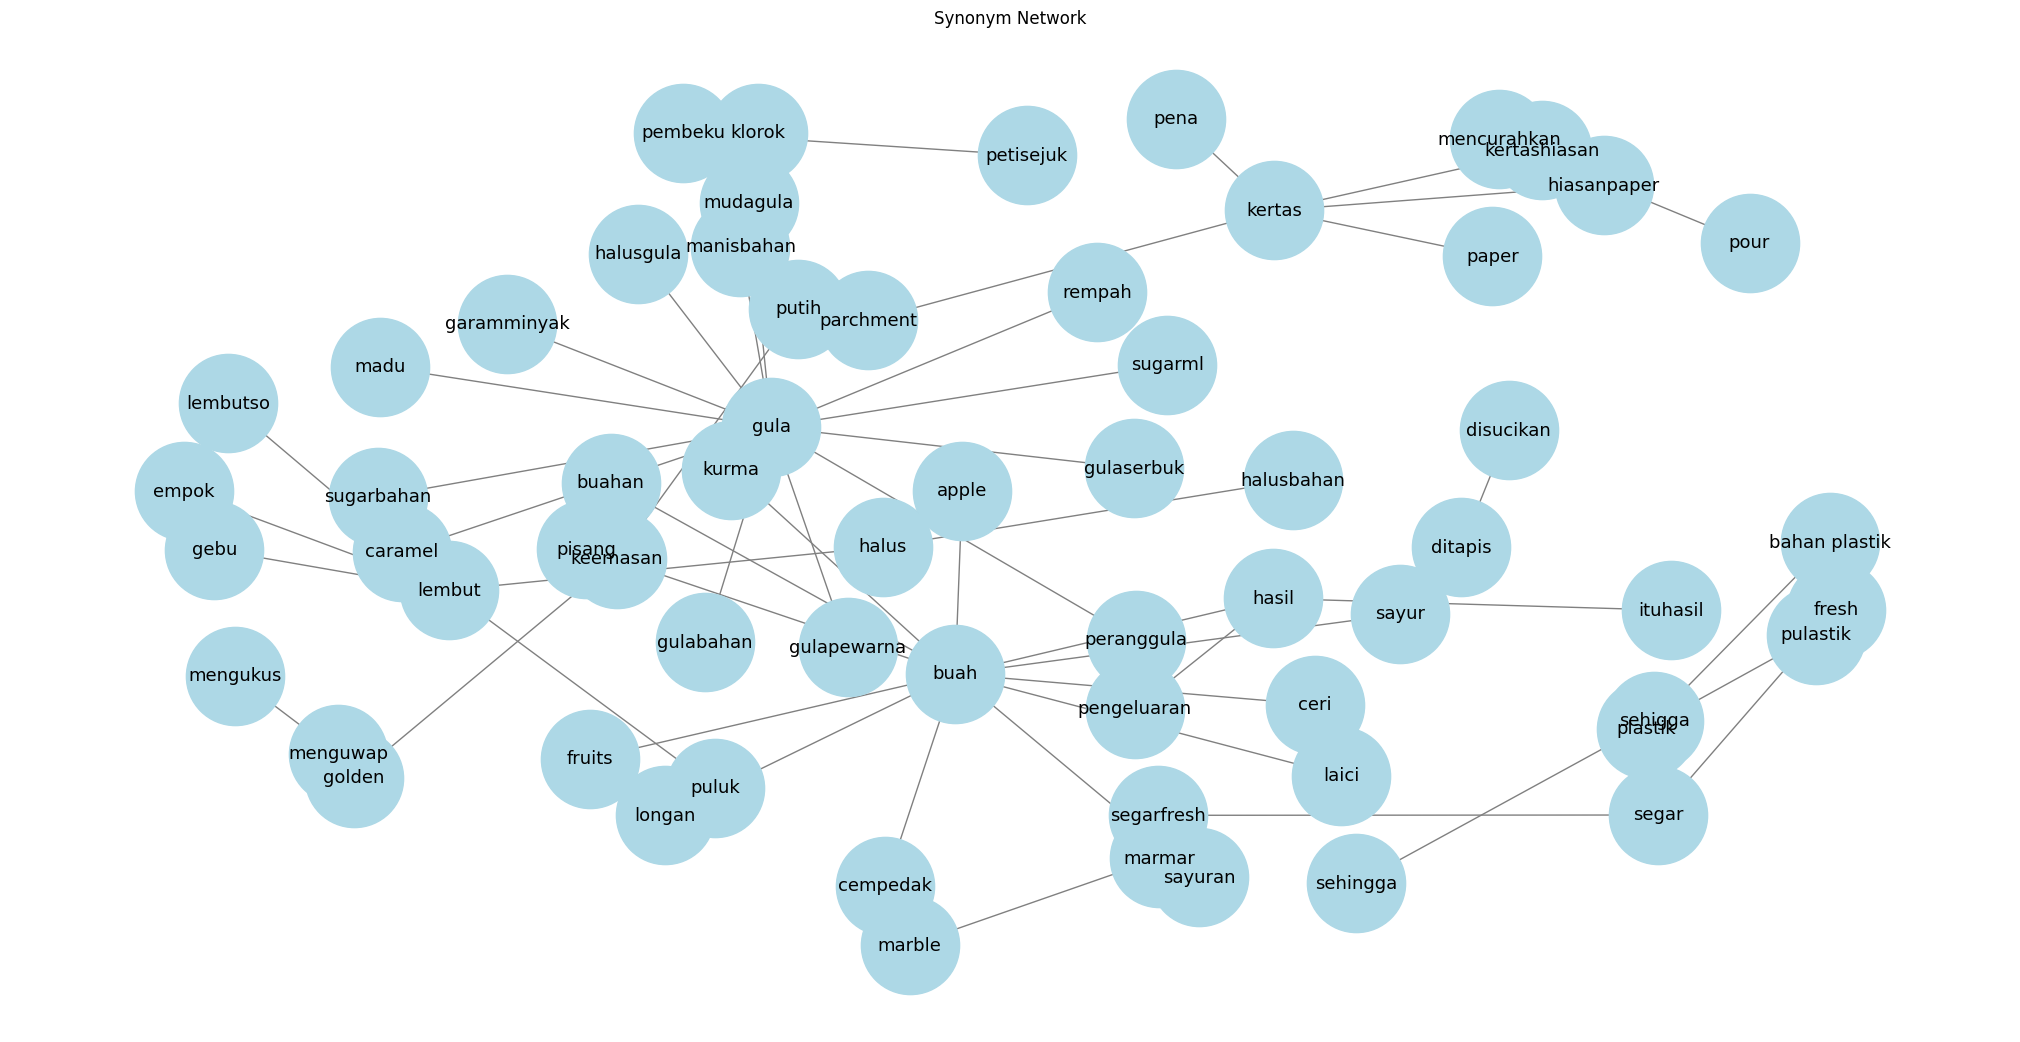

Theme 0: peranggula, gulaserbuk, mudagula, manisbahan, gulabahan, gula, rempah, sugarml, gulapewarna, garamminyak, halusgula, sugarbahan, caramel, madu
Theme 1: apple, buahan, kurma, ceri, fruits, longan, cempedak, buah, pisang, sayuran, sayur, laici
Theme 2: halus, lembutso, puluk, lembut, halusbahan, empok, gebu
Theme 3: kertas, kertashiasan, pena, paper, parchment, hiasanpaper
Theme 4: keemasan, putih, golden, klorok
Theme 5: bahan plastik, plastik, pulastik
Theme 6: pengeluaran, hasil, ituhasil
Theme 7: segar, segarfresh, fresh
Theme 8: pembeku, petisejuk
Theme 9: marble, marmar
Theme 10: mengukus, menguwap
Theme 11: disucikan, ditapis
Theme 12: mencurahkan, pour
Theme 13: sehigga, sehingga


In [2]:
# Graph Visualization Functions
def fetch_synonyms(tx, limit=25):
    query = f"""
    MATCH (w:Word)-[:SYNONYM]-(s:Word)
    RETURN w.word AS word, collect(DISTINCT s.word) AS synonyms
    LIMIT {limit}
    """
    result = tx.run(query)
    return result.values()

def create_synonym_network(driver, limit=25):
    with driver.session() as session:
        synonyms = session.read_transaction(fetch_synonyms, limit)
    
    G = nx.Graph()
    for word, syns in synonyms:
        for syn in syns:
            G.add_edge(word, syn)
    
    return G

def visualize_network(G):
    pos = nx.spring_layout(G, k=0.55)
    plt.figure(figsize=(20, 10))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=5000, font_size=13)
    plt.title("Synonym Network")
    plt.show()

def identify_clusters(G):
    clusters = nx.community.greedy_modularity_communities(G)
    themes = {i: list(cluster) for i, cluster in enumerate(clusters)}
    return themes



G = create_synonym_network(driver, limit=30)  # Limit to 25 words
visualize_network(G)

themes = identify_clusters(G)
for theme_id, words in themes.items():
    print(f"Theme {theme_id}: {', '.join(words)}")

In [3]:
from UtilsRedis import Redis_Utilities
import redis
word_to_search = "gembira"
redis_utils = Redis_Utilities()

sentiment_data = redis_utils.get_sentiment(word_to_search)

synonyms = get_synonyms(driver, word_to_search)
antonyms = get_antonyms(driver, word_to_search)

print(f"Synonyms for '{word_to_search}': {', '.join(synonyms)}")
print(f"Antonyms for '{word_to_search}': {', '.join(antonyms)}")
print(f"Sentiment for '{word_to_search}':", sentiment_data)

Synonyms for 'gembira': senang
Antonyms for 'gembira': sedih
Sentiment for 'gembira': {'sentiment': '0.5'}
